# Градиентный спуск

## Градиент функции:

Градиент - вектор частных производных


$$\nabla f(x) = \begin{pmatrix} \frac {\partial f}{\partial x_1} & \dots &  \frac {\partial f} {\partial x_d} \end{pmatrix}$$

Считаем производную функции в отдельности для каждой переменной $x_1, x_2, \dots, x_d$ (частные производные), составляем вектор из частных производных - градиент (обобщение производной для функции многих переменных). 

<img src='https://github.com/Eapeapeap/permyakova-elizaveta/blob/main/images/gradient.png?raw=1'>

Фиксируем точку $x_0$. В какую сторону функция быстрее всего растёт? Функция растёт в направлении градиента. Если градиент взять с минусом, то он покажет в сторону наискорейшего убывания функции. 
Если градиент равен нулю, то это экстремум.

#### Необходимое условие экстремума:

Если точка $x_0$ - экстремум и в ней существует производная, то $$\nabla f(x_0)=0 $$
Можно посчитать градиент функции, приравнять нулю, решить систему уравнений. Ответов может быть много. 

- Если функция строго выпуклая, то экстремум один. 

- MSE линейной регрессии - выпуклая функция


Градиентные методы - общий подход для обучения моделей (не всегда возможно решить задачу аналитически)

Антиградиент указывает в сторону наискорейшего убывния функции. 

Это можно использовать для поиска минимума функции (минимизация функционала ошибки, например, MSE).



### Алгоритм
1. Стартуем из случайной точки
2. Сдвигаемся по антиградиенту
3. Повторяем, пока не окажемся в точке минимума


### Пример
Один признак

Модель:
$$a(x)=w_1 x + w_0$$

Два параметра: $w_0$ и $w_1$

Функционал ошибки MSE:
$$\displaystyle {Q(w_0, w_1) = \frac{1}{l} \sum _{i=1}^{l}{(w_1 x_i + w_0 - y_i)^2}}$$

<img src='https://github.com/Eapeapeap/permyakova-elizaveta/blob/main/images/MSE.png?raw=1'>

$$\displaystyle {Q(w_0, w_1) = \frac{1}{l} \sum _{i=1}^{l}{(w_1 x_i + w_0 - y_i)^2}}$$
Счиаем частные производные по каждому из весов:
$$\frac {\partial Q}{\partial w_1} = \frac {2}{l} \sum _{i=1} ^{l} x_i (w_1 x_i + w_0 -y_i)$$

$$\frac {\partial Q}{\partial w_0} = \frac {2}{l} \sum _{i=1} ^{l} (w_1 x_i + w_0 -y_i)$$

Градиент (вектор с двумя компонентами):

$$\nabla Q(w) = (\frac {2}{l} \sum _{i=1} ^{l} x_i (w_1 x_i + w_0 -y_i), \frac {2}{l} \sum _{i=1} ^{l} (w_1 x_i + w_0 -y_i))$$

## Алгоритм градиентного спуска Full GD
### Начальное приближение
Сначала нужно как-то инициализировать веса ($w^0$, 0 - номер итерации). Можно сгенерировать веса из стандартного нормального распределения. 

### Шаг алгоритма (повторять до сходимости)
$$w^t = w^{t-1} - \eta \nabla Q(w^{t-1})$$
- $t$ - номер итерации
- $w^t$ - новая точка
- $\eta$ - размер шага
- $\nabla Q(w^{t-1})$ - градиент в предыдущей точке

Остановить процесс, если:
- вектор весов почти не меняется $||w^t - w^{t-1}|| < \epsilon$
или 
- если норма градиента близка к нулю $||Q(w^{t})|| < \epsilon$

__Если признаков много:__
$$\displaystyle {Q(w) = \frac{1}{l} \sum _{i=1}^{l}{(<w, x> - y_i)^2}}$$

$$\frac {\partial Q}{\partial w_1} = \frac {2}{l} \sum _{i=1} ^{l} x_{i1} (<w, x> -y_i)$$
$$\frac {\partial Q}{\partial w_d} = \frac {2}{l} \sum _{i=1} ^{l} x_{id} (<w, x> -y_i)$$

$$\nabla Q(w) = \frac {2}{l} X^T (Xw -y)$$

### Проблема локальных минимумов
- Локальный минимум - точка, в некоторой окрестности которой нет более маленьких значений
- Глобальный минимум - самая низкая точка функции
- Если функция выпуклая (например MSE), то у неё один глобальный=локальный минимум
- Другие функции потерь могут не быть выпуклыми

<img src='https://github.com/Eapeapeap/permyakova-elizaveta/blob/main/images/local_min.png?raw=1'>

- Цель - найти глобальный минимум (там меньше ошибка модели), но это не всегда возможно

- Если стартуем из неудачной точки, то находим только локальный минимум (и застреваем там)

<img src='https://github.com/Eapeapeap/permyakova-elizaveta/blob/main/images/local_min2.png?raw=1'>

- Поэтому градиентный спуск находит __локальный минимум__
- Можно использовать мулитистарт (запуск градиентного спуска из разных начальных точек)

<img src='https://github.com/Eapeapeap/permyakova-elizaveta/blob/main/images/local_min3.png?raw=1'>

### Длина шага
$$w^t = w^{t-1} - \eta \nabla Q(w^{t-1})$$
$\eta$ позволяет контролировать скорость обучения
- Если сделать длину шага недостаточно маленькой, градиентный спуск может разойтись
- Длина шага - параметр, который нужно подбирать

Линия уровня - кривая, вдоль которой функция принимает одно и то же значение. Вид сверху на параболоид

Вектор градиента перепендикулярен линии уровня

#### Переменная длина шага
$$w^t = w^{t-1} - \eta _t \nabla Q(w^{t-1})$$
Длину шага можно менять в зависимости от шага

Например, $$\eta _t = \frac{1}{t}$$. Чем больше итераций сделано, тем меньше шаг

Или $$\eta _t = \lambda(\frac{s}{s+t})^p$$ Дополнительные параметры

#### Масштабирование признаков
- Алгоритм может разойтись, если признаки имеют разные масштабы (линии уровня вытянутые), эллипс, а не круг

$$x_i ^j = \frac{x_i ^j - \mu _j}{\sigma_j}$$

# Алгоритм
Обновление весов:

$$w^{(t+1)} = w^{(t)} - \alpha_t \nabla Q(w^{(t)}),$$

$j$-ая компонента градиента:

$$\frac{\partial Q(w)}{w_j} = \frac{2}{l} \sum_{i=1}^{l}x_{ij}(\langle w, x_i \rangle - y_i).$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.base import BaseEstimator

In [2]:
class LinearRegression(BaseEstimator):
    def __init__(self, epsilon=1e-4, max_steps=1000, w0=None, alpha=1e-2):
        
        self.epsilon = epsilon # разница для нормы изменения весов 
        self.max_steps = max_steps # максимальное количество шагов
        self.w0 = w0 # начальные веса
        self.alpha = alpha # шаг обучения
        self.w = None
        self.w_history = []
    
    def fit(self, X, y):
        
        l, d = X.shape

        if self.w0 is None: # если нет начальной инициализации весов
            self.w0 = np.zeros(d)

        self.w = self.w0

        for step in range(self.max_steps):
            self.w_history.append(self.w)

            w_new = self.w - self.alpha * self.calc_gradient(X, y) #(2,2)

            if (np.linalg.norm(w_new - self.w) < self.epsilon):
                break
          
            self.w = w_new
        
        return self
    
    def predict(self, X):
        
        if self.w is None:
            raise Exception('Not trained yet')
        
        l, d = X.shape 

        y_pred = []

        for i in range(l):
            y_pred.append(np.dot(X[i], self.w))

        return np.array(y_pred)
    
    def calc_gradient(self, X, y):
        
        l, d = X.shape
        gradient = []
        for j in range(d):
            dQ = 0
            for i in range(l):
                dQ += (2/l) * X[i][j] * (np.dot(X[i], self.w) - y[i])
            gradient.append(dQ)

        return np.array(gradient)

### Визуализация траектории градиентного спуска

In [3]:
def plot_gd(X, y, w_history):
    # compute level set
    A, B = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - y, 2))

    plt.figure(figsize=(13, 9))
    plt.title('GD trajectory')
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim((-2.1, 2.1))
    plt.ylim((-2.1, 2.1))

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 2, num=10), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    w_list = np.array(lr.w_history)
    plt.scatter(w_true[0], w_true[1], c='r', marker='*')
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])
    plt.show()

In [4]:
n_features = 2
n_objects = 300
num_steps = 100


np.random.seed(1)
w_true = np.random.normal(0, 0.1, size=(n_features, ))
w_0 = np.random.uniform(-2, 2, (n_features))
X = np.random.uniform(-5, 5, (n_objects, n_features))
y = np.dot(X, w_true) + np.random.normal(0, 1, (n_objects))

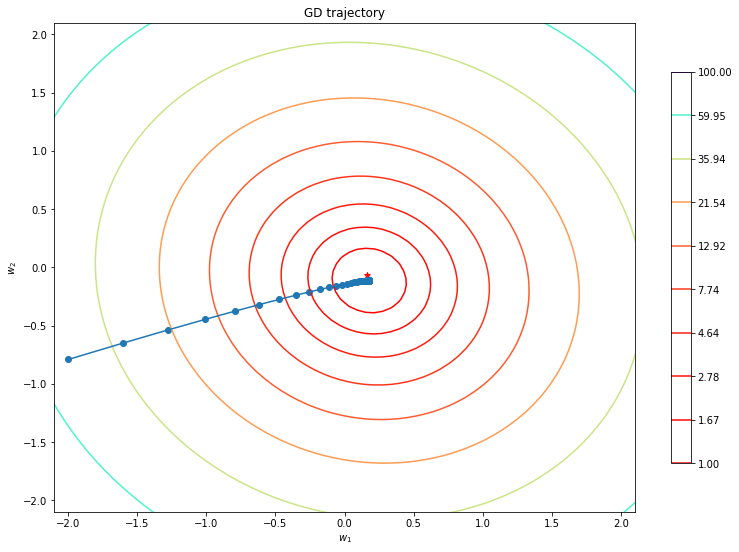

In [5]:
lr = LinearRegression(w0=w_0)
lr.fit(X, y)

plot_gd(X, y, lr.w_history)

### Влияние размера шага на сходимость
$\alpha = 0.0001$

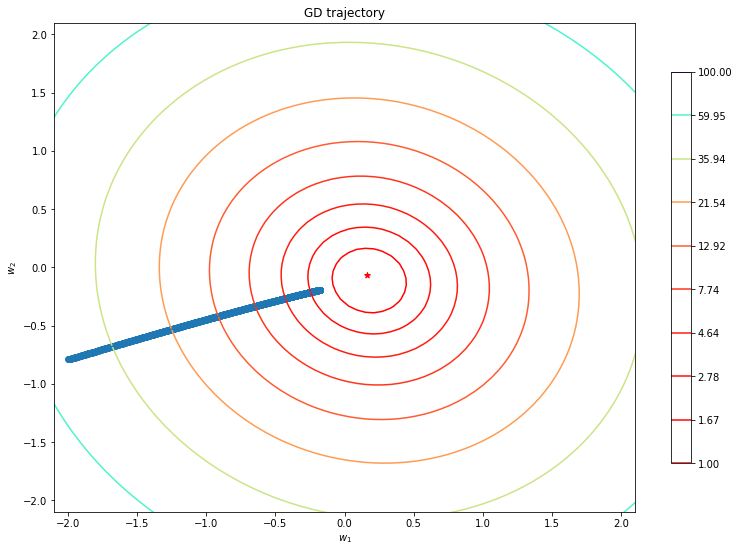

In [6]:
lr = LinearRegression(w0=w_0, alpha=0.0001)
lr.fit(X, y)
plot_gd(X, y, lr.w_history)

$\alpha = 0.01$

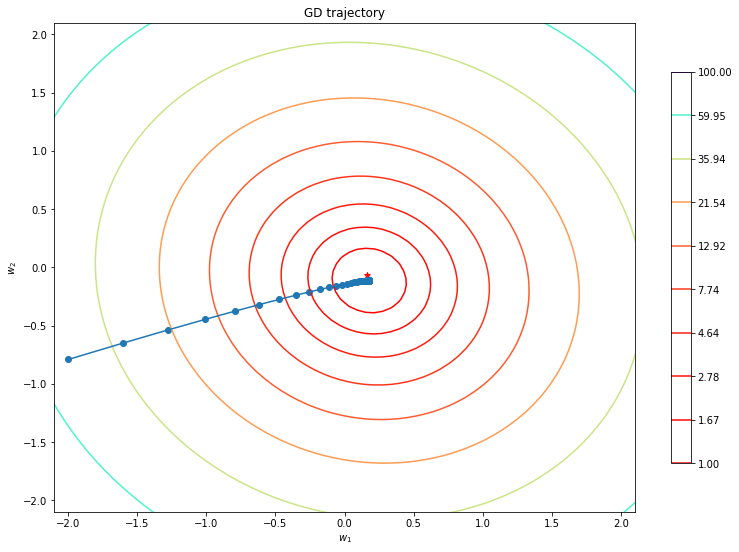

In [7]:
lr = LinearRegression(w0=w_0, alpha=0.01)
lr.fit(X, y)
plot_gd(X, y, lr.w_history)

$\alpha = 0.1$

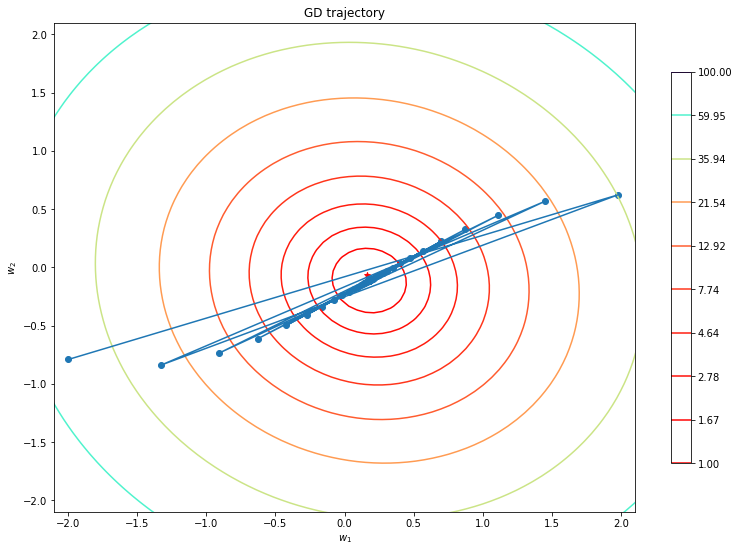

In [8]:
lr = LinearRegression(w0=w_0, alpha=0.1)
lr.fit(X, y)
plot_gd(X, y, lr.w_history)

### Масштабирование признаков
Функция вытянута по одной из координат (признаков)

При каждом шаге вдоль антиградиента мы шагаем перпендикулярно линиям уровня

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in subtract


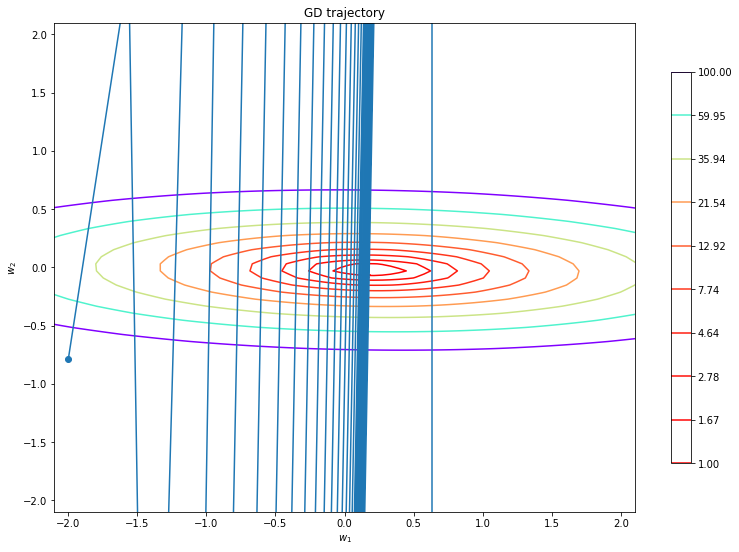

In [9]:
X_new = X.copy()
X_new[:,1] = X_new[:,1] * 5

lr = LinearRegression(w0=w_0, alpha=0.01)
lr.fit(X_new, y)
plot_gd(X_new, y, lr.w_history)

## Стохастический градиентный спуск SGD
Для вычисления обычного градиента, для каждой частной производной происходит суммирование по всей обучающей выборке. Она может быть очень большой. Это нужно делать для каждого шага (на каждой итерации).
Для этого требуется слишком много вычислений. 

Будем шагать не по среднему по всем градиентам, а по градиенту одного объекта (одного слагаемого из функционала ошибки).

## Алгоритм стохастического градиентного спуска

1. Начальное приближение $w^0$
2. Шаг алгоритма 
Повторять, каждый раз выбирая случайных объект $i_t$
$$w^t = w^{t-1} - \eta \nabla L(y_{i_{t}}, a(x_{i_{t}}))$$
Берём значение функции потерь на объекте $i_t$

3. Остановить процесс, если вектор весов почти не меняется $||w^t - w^{t-1}|| < \epsilon$

Траектория стохастического градиентного спуска будет более ломанной, и в конце будет сложно попасть в минимум. Здесь очень важная уменьшающаяся длина шага

Для сходимости SGD требуется гораздо больше итераций, чем для Full GD, но каждый шаг очень быстрый

### Mini-batch SGD
То же самое, что и SGD, но шаг делается по нескольким случайным объектам (batch, пакет)

SGD можно применять на больших выборках, не помещающихся в RAM

## Другие модификации GD
###  Проблемы градиентного спуска:
1. Сложные линии уровня (если линии уровня имеют форму эллипса, первые шаги будут выглядеть как осцилляции (колебания), а не движение в направлении к минимуму). Будет трактория зигзага и много лишних итераций. Чем меньше линии уровня похожи на окружности, тем сложнее градиентному спуску двигаться. Это может произойти из-за немасштабированных признаков или сложной функции потерь.
2. Разная скорость сходимости по разным параметрам

### Градиентный спуск с инерцией (momentum)
$$h_t = \alpha h_{t-1} + \eta _t \nabla Q (w^{t-1})$$

$$w^t = w^{t-1} - h_t$$

- $h_t$ - инерция, усредненное направление движения, обновляется на каждом шаге
- $\alpha$ - параметр затухания (обычно 0.9), гиперпараметр
- $\eta_t$ - длина шага
- _Как будто шарик, который катится в сторону минимума, очень тяжёлый_
- Копим в $h_t$ среднее значение градиента со всех прошлых шагов. Экспоненциально-затухающее среднее. Берём все прошлые значения, умножаем на $\alpha$ и прибавляем новый градиент. Чем раньше был какой-то градиент, тем меньше он будет иметь вклад в $h_t$. 
- Метод очень популярен в глубоком обучении в задачах машинного зрения

Без инерции

<img src='https://github.com/Eapeapeap/permyakova-elizaveta/blob/main/images/gd_momentum.png?raw=1'>

С инерцией

<img src='https://github.com/Eapeapeap/permyakova-elizaveta/blob/main/images/gd_momentum2.png?raw=1'>

Осцилляции быстро убывают. 

### Nesterov momentum
$$h_t = \alpha h_{t-1} + \eta _t \nabla Q (w^{t-1} - \alpha h_{t-1})$$

$$w^t = w^{t-1} - h_t$$

- $w^{t-1} - \alpha h_{t-1}$ - неплохая оценка того, куда мы попадём на следующем шаге
- шагаем в направлении $\alpha h_{t-1}$, считаем градиент в этой точке и "дошагиваем" по этому антиградиенту дальше

#### Проблема с разреженными данными
Например, в модели есть категориальные признаки и использовалось one-hot кодирование. По редким бинарным признакам (редкая категория) шаги могут быть очень маленькими, так как объект с редкой категорией может встретитьсся уже ближе к концу работу алгоритма, когда шаги очень маленькие. Веса будут настраиваться хуже.

#### Проблема с разным масштабом
Какой-то признак может меняться в диапазоне от 0 до 1, а какой-то от 0 до 1 млн. Тогда нужно шагать по каждому параметру с разной скоростью. Быстрее обновлять веса при признаке единичного масштаба и медленнее при признаке миллионного масштаба. 

### AdaGrad

$$G^ t _j = G^ {t-1} _j + (\nabla Q(w^{t-1}))^2 _j$$

$$w^t _j = w^{t-1} _j - \frac{\eta _t}{\sqrt{G^t _j + \epsilon} } (\nabla Q (w^{t-1}))_j$$

- В $G_j$ накапливаются квадраты градиентов по $j$ признаку, то есть частных производных по нему. Насколько сильно уже нашагали по j параметру
- Длина шага нормируется на знаменатель. Если по этому признаку много нашагали, то знаменатель большой. 
- По каждому параметру будет своя скорость
- Недостаток алгоритма $G_j$ может только расти на каждой итерации t

### RMSProp
$$G^ t _j = \alpha G^ {t-1} _j + (1-\alpha)(\nabla Q(w^{t-1}))^2 _j$$

$$w^t _j = w^{t-1} _j - \frac{\eta _t}{\sqrt{G^t _j + \epsilon} } g_{tj}$$
- Скорость зависит только от недавних шагов
- $\alpha$ обычно 0.9

### Adam
Совмешает идею инерции и своей длины шага по каждому признаку

// страшная формула

В итоге momentum позволяет избавиться от осцилляций, а методы типа AdaGrad позволяют грамотнее задавать темп движения по каждому параметру. 

# Алгоритм
Обновление весов:

$$w^{(t+1)} = w^{(t)} - \alpha_t \nabla Q(w^{(t)}),$$

$j$-ая компонента градиента:

$$\frac{\partial Q(w)}{w_j} = \frac{2}{l} \sum_{i=1}^{l}x_{ij}(\langle w, x_i \rangle - y_i).$$

# Домашнее задание
## Задание 1
Реализуйте класс ```LinearRegressionSGD``` c обучением и и применением линейной регрессии, построенной с помощью стохастического градиентного спуска, с заданным интерфейсом.

Обратите внимание на следуюшие моменты:
- Схожий класс использовался в лекции
- Выбирайте **10** случайных сэмплов (равномерно) каждый раз. 
- Используйте параметры по умолчанию (epsilon=1e-6, max_steps=10000, w0=None, alpha=1e-8)
- Выход из цикла осуществуется по сравнению 2-нормы разницы весов с epsilon, а функция потерь - MSE.


Визуализируйте траекторию градиентного спуска (как в лекции)

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
np.random.seed(0)

In [11]:
class LinearRegressionSGD(BaseEstimator):
    def __init__(self, epsilon=1e-6, max_steps=10000, w0=None, alpha=1e-8):
        """
        epsilon: разница для нормы изменения весов 
        max_steps: максимальное количество шагов в градиентном спуске
        w0: np.array (d,) - начальные веса
        alpha: шаг обучения
        """
        self.epsilon = epsilon # разница для нормы изменения весов 
        self.max_steps = max_steps # максимальное количество шагов
        self.w0 = w0 # начальные веса
        self.alpha = alpha # шаг обучения
        self.w = None
        self.w_history = []
    
    def fit(self, X, y):
        """
        X: np.array (l, d)
        y: np.array (l)
        ---
        output: self
        """
        l, d = X.shape

        if self.w0 is None: # если нет начальной инициализации весов
            self.w0=np.random.uniform(-2, 2, (d))

        self.w = self.w0

        for step in range(self.max_steps):
            self.w_history.append(self.w)

            w_new = self.w - self.alpha * self.calc_gradient(X, y)

            if (np.linalg.norm(w_new - self.w) < self.epsilon):
                break
          
            self.w = w_new
        
        return self
    
    def predict(self, X):
        """
        X: np.array (l, d)
        ---
        output: np.array (l)
        """
        if self.w is None:
            raise Exception('Not trained yet')
        
        l, d = X.shape 

        y_pred = []

        for i in range(l):
            y_pred.append(np.dot(X[i], self.w))

        return np.array(y_pred)
    
    def calc_gradient(self, X, y):
        """
        X: np.array (l, d)
        y: np.array (l)
        ---
        output: np.array (d)
        """
        l, d = X.shape
        gradient = []
        for j in range(d):
            dQ = 0
            for i in np.random.choice(l,10):
                dQ += (2/10) * X[i][j] * (np.dot(X[i], self.w) - y[i])
            gradient.append(dQ)
        # np.random.choice(l,10) возвращает список из 10 элементов, выбранных случайно из массива np.arange(l),
                                                                            # распределение - равномерное
        return np.array(gradient)

In [12]:
n_features = 2
n_objects = 300
num_steps = 100
np.random.seed(1)
w_true = np.random.normal(0, 0.1, size=(n_features, ))
w_0 = np.random.uniform(-2, 2, (n_features))
X = np.random.uniform(-5, 5, (n_objects, n_features))
y = np.dot(X, w_true) + np.random.normal(0, 1, (n_objects))

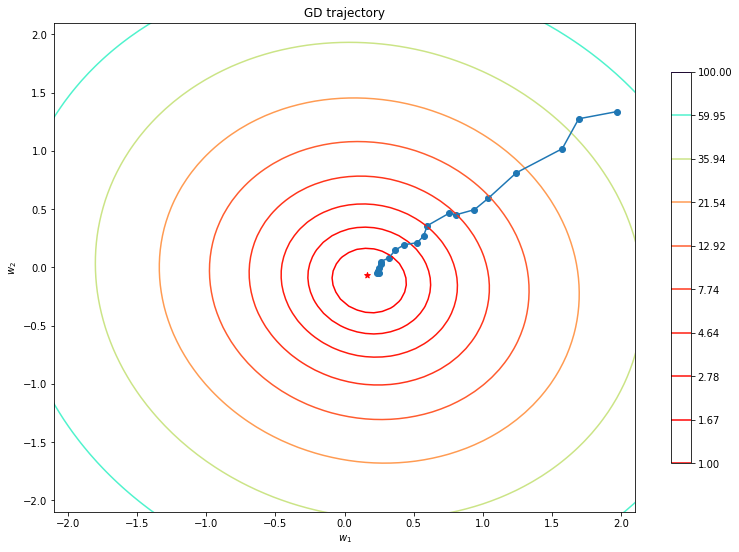

In [13]:
lr = LinearRegressionSGD(epsilon=1e-2, max_steps=100000, w0=None, alpha=1e-2)
lr.fit(X, y)

plot_gd(X, y, lr.w_history)

## Задание 2
Предсказать стоимость домов

Сравнить алгоритмы линейной регресии с полным градиентным спуском и стохастическим градиентным спуском по MSE на тестовой выборке и времени работы алгоритма


In [14]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(np.array(X), y, test_size=0.3, random_state=10)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)#нормализация входных данных
X_test=scaler.transform(X_test)#нормализация входных данных

lr_SGD = LinearRegressionSGD(epsilon=1e-6, max_steps=10000, w0=None, alpha=1e-2)
start_time_SGD = datetime.now()
lr_SGD.fit(X_train, y_train)
print("Mini-batch SGD: {} c".format((datetime.now() - start_time_SGD).seconds))

start_time_full = datetime.now()
lr_Full = LinearRegression(epsilon=1e-6, max_steps=10000, w0=None, alpha=1e-2)
lr_Full.fit(X_train, y_train)
print("Full GD time: {} с".format((datetime.now() - start_time_full).seconds))

Mini-batch SGD: 6 c
Full GD time: 124 с


In [15]:
predictions_SGD = lr_SGD.predict(X_test)
predictions_Full = lr_Full.predict(X_test)
print("первые 5 значений:")
print("Предсказанные значения агоритмом SGD:")
print(np.round(predictions_SGD[:5],2))
print("Предсказанные значения обычным градиентным спуском:")
print(np.round(predictions_Full[:5],2))
print("истинные значения:")
print(y_test[:5])

первые 5 значений:
Предсказанные значения агоритмом SGD:
[28.91 30.26 28.41 26.9  17.07]
Предсказанные значения обычным градиентным спуском:
[28.61 30.11 28.17 27.02 18.  ]
истинные значения:
[28.4 31.1 23.5 26.6 19.6]
